In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from datetime import timedelta
import pickle
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.axes_grid1 import host_subplot
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
wikiurl='https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [3]:
soup = BeautifulSoup(response.text, 'html.parser')
sp_table=soup.find('table',{'class':"wikitable"})

In [4]:
df=pd.read_html(str(sp_table))
df=pd.DataFrame(df[0])
df['Symbol'] = df['Symbol'].str.replace('.','-',regex = True)
df.index = df['Symbol']
df = df.drop('Symbol', axis = 1)
df

,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
Symbol,,,,,,,,
MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...
YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [5]:
start = dt.datetime(2010,1,1)
end = dt.datetime.now()

In [6]:
%%time
sp = yf.download(list(df.index), start = start, end = end)['Close']
sp

[*********************100%***********************]  503 of 503 completed
CPU times: total: 27.7 s
Wall time: 42.7 s


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,22.389128,4.77,40.380001,7.643214,NaN,26.629999,8.740000,26.129908,42.070000,37.090000,...,63.959999,21.080000,69.150002,35.330002,NaN,25.226456,58.271847,28.670000,13.330000,NaN
2010-01-05,22.145924,5.31,40.139999,7.656429,NaN,26.440001,8.530000,25.918797,42.330002,37.700001,...,67.849998,20.830000,69.419998,34.910000,NaN,25.140186,60.116505,28.620001,13.800000,NaN
2010-01-06,22.067240,5.09,40.490002,7.534643,NaN,26.190001,8.400000,26.062737,42.779999,37.619999,...,66.959999,20.870001,70.019997,35.139999,NaN,24.960461,60.097088,28.400000,15.000000,NaN
2010-01-07,22.038628,5.24,40.480000,7.520714,NaN,25.770000,8.400000,26.278646,42.740002,36.889999,...,68.389999,20.780001,69.800003,35.599998,NaN,24.953272,61.475727,27.690001,16.680000,NaN
2010-01-08,22.031473,5.14,40.639999,7.570714,NaN,26.049999,8.230000,26.412991,42.570000,36.689999,...,67.900002,20.790001,69.519997,35.599998,NaN,24.960461,60.184467,27.600000,16.410000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,119.209999,13.13,173.639999,138.929993,153.800003,143.139999,254.559998,110.220001,280.649994,368.480011,...,58.180000,72.629997,87.550003,36.200001,78.750000,116.709999,107.269997,299.339996,51.380001,174.210007
2022-07-05,120.559998,13.88,182.309998,141.559998,153.929993,140.710007,256.660004,109.300003,275.170013,376.489990,...,57.790001,69.889999,84.809998,36.099998,78.800003,117.330002,106.889999,302.329987,51.080002,174.250000
2022-07-06,121.180000,13.89,181.770004,142.919998,152.529999,139.839996,253.330002,108.690002,275.940002,382.829987,...,55.840000,71.010002,83.279999,35.619999,79.510002,116.830002,105.730003,294.529999,50.410000,178.500000


In [7]:
with open('sp_update.txt', "wb") as file:
    pickle.dump(sp, file)

In [8]:
with open('sp_update.txt', "rb") as file:
    sp = pickle.load(file)
sp

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,22.389128,4.77,40.380001,7.643214,NaN,26.629999,8.740000,26.129908,42.070000,37.090000,...,63.959999,21.080000,69.150002,35.330002,NaN,25.226456,58.271847,28.670000,13.330000,NaN
2010-01-05,22.145924,5.31,40.139999,7.656429,NaN,26.440001,8.530000,25.918797,42.330002,37.700001,...,67.849998,20.830000,69.419998,34.910000,NaN,25.140186,60.116505,28.620001,13.800000,NaN
2010-01-06,22.067240,5.09,40.490002,7.534643,NaN,26.190001,8.400000,26.062737,42.779999,37.619999,...,66.959999,20.870001,70.019997,35.139999,NaN,24.960461,60.097088,28.400000,15.000000,NaN
2010-01-07,22.038628,5.24,40.480000,7.520714,NaN,25.770000,8.400000,26.278646,42.740002,36.889999,...,68.389999,20.780001,69.800003,35.599998,NaN,24.953272,61.475727,27.690001,16.680000,NaN
2010-01-08,22.031473,5.14,40.639999,7.570714,NaN,26.049999,8.230000,26.412991,42.570000,36.689999,...,67.900002,20.790001,69.519997,35.599998,NaN,24.960461,60.184467,27.600000,16.410000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,119.209999,13.13,173.639999,138.929993,153.800003,143.139999,254.559998,110.220001,280.649994,368.480011,...,58.180000,72.629997,87.550003,36.200001,78.750000,116.709999,107.269997,299.339996,51.380001,174.210007
2022-07-05,120.559998,13.88,182.309998,141.559998,153.929993,140.710007,256.660004,109.300003,275.170013,376.489990,...,57.790001,69.889999,84.809998,36.099998,78.800003,117.330002,106.889999,302.329987,51.080002,174.250000
2022-07-06,121.180000,13.89,181.770004,142.919998,152.529999,139.839996,253.330002,108.690002,275.940002,382.829987,...,55.840000,71.010002,83.279999,35.619999,79.510002,116.830002,105.730003,294.529999,50.410000,178.500000


In [9]:
def regressorizer(y):
    y = y.dropna()
    if y.shape[0] == 0:
        y = np.asarray([0])
    x = np.asarray(np.matrix([i for i in range(y.shape[0])])).T
    reg = LinearRegression().fit(x,y)
    coeff1 = float(reg.coef_.round(3))
    if y.shape[0] < 3:
        coeff1 = np.nan
    return coeff1

# Price Regression

In [10]:
%%time
sp_reg = sp.resample('W-MON',label = 'right',closed = 'left').apply(lambda x: regressorizer(x))
sp_reg

CPU times: total: 2min 23s
Wall time: 2min 23s


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-11,-0.082,0.067,0.086,-0.028,NaN,-0.183,-0.115,0.093,0.141,-0.161,...,0.842,-0.063,0.112,0.123,NaN,-0.072,0.518,-0.307,0.904,NaN
2010-01-18,-0.006,0.143,-0.184,-0.024,NaN,0.185,0.030,0.024,0.142,-0.044,...,0.977,0.121,-0.265,0.055,NaN,0.071,-0.255,0.091,0.016,NaN
2010-01-25,-0.358,-0.148,0.079,-0.198,NaN,-0.269,0.033,-0.276,-0.513,-0.838,...,-2.490,-0.245,-1.084,-0.754,NaN,-0.306,-1.023,-0.298,0.209,NaN
2010-02-01,-0.246,0.027,-0.288,-0.102,NaN,0.014,-0.063,-0.194,-0.232,-0.477,...,-0.450,0.004,-0.380,-0.269,NaN,-0.009,-1.248,-0.351,0.236,NaN
2010-02-08,-0.025,0.011,0.020,-0.008,NaN,-0.261,0.124,0.031,-0.231,-0.016,...,-1.234,-0.238,-0.500,-0.350,NaN,-0.525,-0.571,-0.023,-0.626,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-13,-1.888,-0.440,-2.480,-2.409,-1.037,-1.048,-3.046,-1.775,-4.854,-7.824,...,-1.028,-1.170,0.220,-0.584,-1.435,-1.283,-1.416,-8.001,-1.082,-2.633
2022-06-20,-0.819,-0.155,-1.479,-0.334,-0.075,-0.193,-2.649,-0.763,-0.646,-2.746,...,-0.882,-0.989,-2.417,-0.367,-1.153,-0.427,-1.693,-1.786,0.221,0.531
2022-06-27,2.703,0.246,3.808,2.029,2.850,1.518,8.147,1.589,4.935,8.550,...,1.059,1.290,-1.639,0.515,1.571,0.942,2.101,3.877,-0.079,4.276


The resample uses the 'right' label method in order to make back testing easier. The date index is always the Monday following the week regressed. In other words, the regression scores for '2010-01-11' are based off data from the week prior, beginning '2010-01-04.' To test the scores from '2010-01-11,' data beginning on '2010-01-11' and ending on '2010-01-15' will be used. 

In [11]:
sp_reg.loc['2010-01-11'][sp_reg.loc['2010-01-11'] == sp_reg.loc['2010-01-11'].max()]

NVR    4.014
Name: 2010-01-11 00:00:00, dtype: float64

## Weekly Top 50

In [12]:
%%time
top50 = pd.DataFrame([(sp_reg.iloc[[i]].sort_values(by = sp_reg.index[i],axis = 1, ascending = False).columns[:50]).T for i in range(len(sp_reg))], index = sp_reg.index)
top50

CPU times: total: 344 ms
Wall time: 343 ms


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-11,NVR,GE,MTB,CMI,BA,BKR,SWK,MOS,ELV,SIVB,...,MDT,TDG,PRU,C,ROK,AMP,JPM,SNA,TGT,TFC
2010-01-18,NVR,ILMN,WYNN,ELV,CRL,CMG,IBM,MRK,DPZ,HUM,...,IDXX,TXT,UHS,POOL,STZ,REG,BWA,MSFT,SLB,VNO
2010-01-25,BRK-B,CMA,ISRG,EL,SBNY,AIZ,RJF,MTB,FITB,STX,...,GILD,PWR,EW,ROL,UAL,ULTA,DXCM,FTNT,LKQ,ADM
2010-02-01,BRK-B,BA,AMGN,ROK,ALGN,NFLX,SPGI,PNC,MCO,GILD,...,USB,CTXS,REGN,PSA,GIS,ROST,BAC,UNH,BKR,VTRS
2010-02-08,WTW,STE,CMI,ROP,SWK,EMR,RMD,COO,CLX,MHK,...,MAS,ORCL,LDOS,AAPL,IDXX,ORLY,ROL,ADBE,TMO,TTWO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-13,SJM,DPZ,BF-B,DG,CPB,EOG,XOM,VLO,BIIB,K,...,HPE,KDP,MRO,HBAN,HII,FANG,ROL,FE,KR,CME
2022-06-20,REGN,FDX,BA,VRTX,CMG,EQIX,EPAM,GOOG,LH,MRNA,...,ENPH,TECH,DFS,UDR,CBOE,C,NVDA,NUE,CME,ZION
2022-06-27,NVR,AZO,GOOG,GOOGL,CMG,MTD,NOW,EQIX,ORLY,INTU,...,CRL,CRM,NFLX,IT,MCO,AON,UNH,GS,SBNY,IQV


## Top 50 Returns

In [13]:
%%time
returns = []
for i in range(len(top50)-1):
    df_cprod = pd.DataFrame(index = [0])
    start = top50.index[i]
    end = start + timedelta(days = 6)
    for ticker in top50.iloc[i]:
        df_cprod[ticker] = sp[[ticker]][start:end].pct_change().apply(lambda x: (1+x).cumprod()).iloc[-1][0]
    df_cprod.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_cprod = df_cprod.dropna('columns')
    returns.append(round(df_cprod.T.mean()[0],4))
returns = pd.DataFrame(returns)

CPU times: total: 60 s
Wall time: 1min


If all tickers in the weekly "portfolio" are equally weighted, the total return is equal to the mean of all the individual returns.

In [14]:
returns.index = top50.index[:len(top50.index)-1]
returns.columns = ['Returns']
returns

,Returns
Date,
2010-01-11,0.9913
2010-01-18,0.9532
2010-01-25,0.9925
2010-02-01,0.9727
2010-02-08,1.0255
...,...
2022-06-06,0.9453
2022-06-13,0.9523
2022-06-20,1.0488


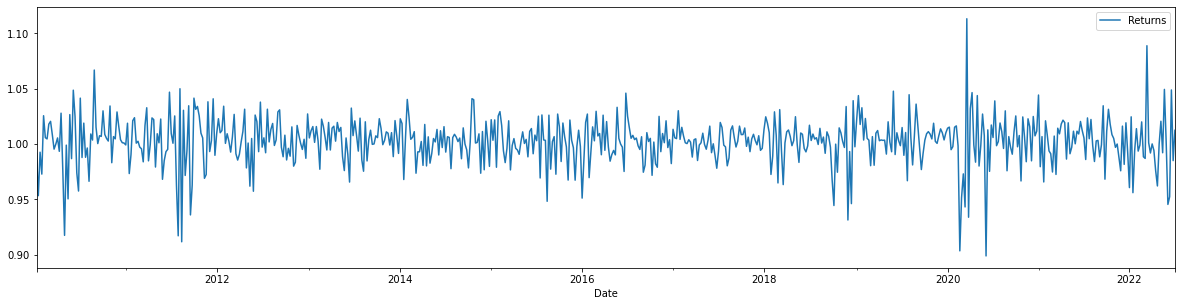

In [15]:
returns.plot(figsize = (20.4,4.8));

## Portfolio Value

In [16]:
capital = 1000
value = []
for i in returns['Returns']:
    capital *= i
    value.append(capital)
value = pd.DataFrame(value, index = returns.index)
value.columns = ['Portfolio Value']
df2 = pd.DataFrame([0],columns = ['Portfolio Value'],index = [sp.index[-1]])
value.append(df2)
value = value.shift(1)
value.iloc[0] = 1000
value

,Portfolio Value
Date,
2010-01-11,1000.000000
2010-01-18,991.300000
2010-01-25,944.907160
2010-02-01,937.820356
2010-02-08,912.217861
...,...
2022-06-06,3901.398538
2022-06-13,3687.992038
2022-06-20,3512.074817


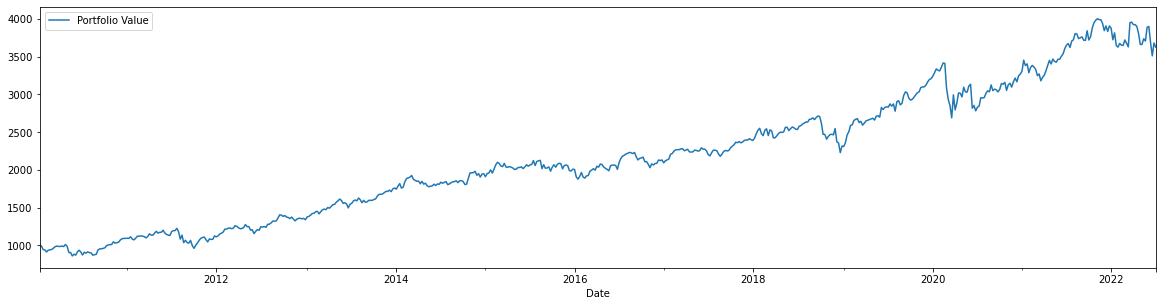

In [17]:
value.plot(figsize = (20,4.8));

#### Max Value

In [18]:
value['Portfolio Value'].loc[value['Portfolio Value'] == value['Portfolio Value'].max()]

Date
2021-11-08    4004.19982
Freq: W-MON, Name: Portfolio Value, dtype: float64

## Stats

In [19]:
starting_value = 1000
starting_value

1000

In [20]:
final_value = float(value.iloc[-1])
final_value

3627.8437609860584

In [21]:
total_days = len(sp) - 1
total_days

3149

In [22]:
total_years = total_days / 251
total_years

12.54581673306773

We can find the annual rate of return by solving for r in the following equation:

$$
    \text {Final Value}\ = \text {Starting Value}\ * e^{r * T}
$$

Which gives us

$$ 
   r = \frac {1}{T}\ ln(\frac {\text {Final Value}\ }{ \text {Starting Value}\ })
$$

In [23]:
annual_return = (1/total_years)*(np.log(final_value/starting_value))
annual_return

0.10271459355461607

In [24]:
1000*np.exp(annual_return*total_years)

3627.843760986058

In [25]:
value_pct_change = value.pct_change()
value_pct_change

,Portfolio Value
Date,
2010-01-11,NaN
2010-01-18,-0.0087
2010-01-25,-0.0468
2010-02-01,-0.0075
2010-02-08,-0.0273
...,...
2022-06-06,0.0025
2022-06-13,-0.0547
2022-06-20,-0.0477


#### Sharpe

In [26]:
annualized_std = value_pct_change.std()*np.sqrt(52)
annualized_std

Portfolio Value    0.15533
dtype: float64

In [27]:
sharpe = annual_return/annualized_std
sharpe

Portfolio Value    0.661266
dtype: float64

## S&P 500

In [28]:
start = dt.datetime(2010,1,1)
end = sp.index[-1]

In [29]:
spy = yf.download('SPY', start, end)[['Close']]
spy

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2010-01-04,113.330002
2010-01-05,113.629997
2010-01-06,113.709999
2010-01-07,114.190002
2010-01-08,114.570000
...,...
2022-06-30,377.250000
2022-07-01,381.239990
2022-07-05,381.959991


In [30]:
spy_pct_change = spy.pct_change()
spy_pct_change.replace(np.nan, 0, inplace=True)
spy_pct_change

,Close
Date,
2010-01-04,0.000000
2010-01-05,0.002647
2010-01-06,0.000704
2010-01-07,0.004221
2010-01-08,0.003328
...,...
2022-06-30,-0.008124
2022-07-01,0.010577
2022-07-05,0.001889


In [31]:
capital = 1000
spy_value = []
for i in spy_pct_change['Close']:
    capital *= (1+i)
    spy_value.append(capital)
spy_value = pd.DataFrame(spy_value, index = spy.index)
spy_value.columns = ['SPY Value']
df2 = pd.DataFrame([0],columns = ['SPY Value'],index = [sp.index[-1]])
spy_value.append(df2)
spy_value.iloc[0] = 1000
spy_value

,SPY Value
Date,
2010-01-04,1000.000000
2010-01-05,1002.647096
2010-01-06,1003.353016
2010-01-07,1007.588464
2010-01-08,1010.941479
...,...
2022-06-30,3328.774322
2022-07-01,3363.981153
2022-07-05,3370.334292


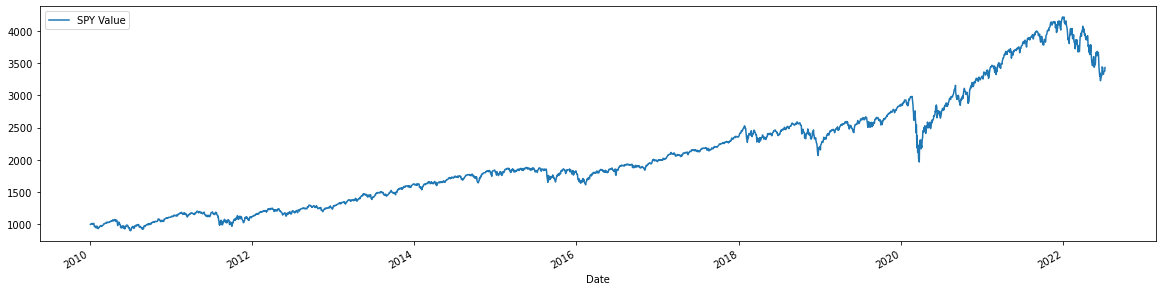

In [32]:
spy_value.plot(figsize = (20,4.8));

#### Stats

In [33]:
spy_final_value = float(spy_value.iloc[-1])
spy_final_value

3432.365516187459

In [34]:
spy_starting_value = float(spy_value.iloc[0])
spy_starting_value

1000.0

In [35]:
spy_annual_return = (1/total_years)*(np.log(spy_final_value/spy_starting_value))
spy_annual_return

0.09829967267812988

In [36]:
spy_annualized_std = float(spy_pct_change.std()*np.sqrt(251))
spy_annualized_std

0.17368447449036112

In [37]:
spy_sharpe = spy_annual_return/spy_annualized_std
spy_sharpe

0.5659669522366271

## Combined Plot

In [38]:
port_spy = value.join(spy_value)
port_spy = port_spy.fillna(method = 'ffill')
port_spy

,Portfolio Value,SPY Value
Date,,
2010-01-11,1000.000000,1012.353318
2010-01-18,991.300000,1012.353318
2010-01-25,944.907160,968.587266
2010-02-01,937.820356,962.322384
2010-02-08,912.217861,934.350990
...,...,...
2022-06-06,3901.398538,3633.548062
2022-06-13,3687.992038,3308.920797
2022-06-20,3512.074817,3308.920797


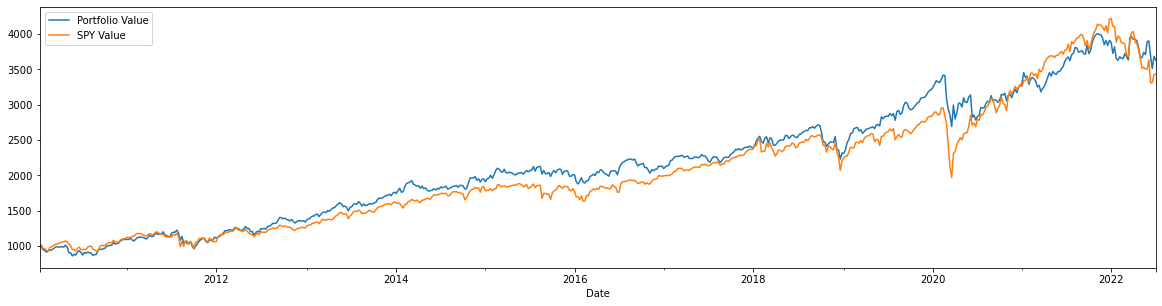

In [39]:
port_spy.plot(figsize = (20,4.8));

In [40]:
port_spy.corr()

,Portfolio Value,SPY Value
Portfolio Value,1.0000,0.9833
SPY Value,0.9833,1.0000


In [41]:
cov = port_spy.pct_change().cov()
cov

,Portfolio Value,SPY Value
Portfolio Value,0.000464,0.000377
SPY Value,0.000377,0.000574


In [42]:
beta = cov['SPY Value'].iloc[0]/cov['SPY Value'].iloc[-1]
beta

0.6565599625897859

# Returns Regression

In [43]:
sp_pct = sp.pct_change()
sp_pct.replace([np.inf, -np.inf], np.nan, inplace=True)
sp_pct

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.010863,0.113208,-0.005944,0.001729,NaN,-0.007135,-0.024027,-0.008079,0.006180,0.016446,...,0.060819,-0.011860,0.003905,-0.011888,NaN,-0.003420,0.031656,-0.001744,0.035259,NaN
2010-01-06,-0.003553,-0.041431,0.008720,-0.015906,NaN,-0.009455,-0.015240,0.005553,0.010631,-0.002122,...,-0.013117,0.001920,0.008643,0.006588,NaN,-0.007149,-0.000323,-0.007687,0.086957,NaN
2010-01-07,-0.001297,0.029469,-0.000247,-0.001849,NaN,-0.016037,0.000000,0.008284,-0.000935,-0.019405,...,0.021356,-0.004312,-0.003142,0.013090,NaN,-0.000288,0.022940,-0.025000,0.112000,NaN
2010-01-08,-0.000325,-0.019084,0.003953,0.006648,NaN,0.010865,-0.020238,0.005112,-0.003978,-0.005422,...,-0.007165,0.000481,-0.004012,0.000000,NaN,0.000288,-0.021004,-0.003250,-0.016187,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.003705,0.035489,0.003178,0.016164,0.004179,0.011733,0.028484,0.014450,0.010805,0.006611,...,0.021060,0.026427,0.022303,0.013154,0.007291,0.028191,0.021036,0.018336,0.009430,0.013497
2022-07-05,0.011325,0.057121,0.049931,0.018930,0.000845,-0.016976,0.008250,-0.008347,-0.019526,0.021738,...,-0.006703,-0.037725,-0.031296,-0.002762,0.000635,0.005312,-0.003542,0.009989,-0.005839,0.000230
2022-07-06,0.005143,0.000720,-0.002962,0.009607,-0.009095,-0.006183,-0.012974,-0.005581,0.002798,0.016840,...,-0.033743,0.016025,-0.018040,-0.013296,0.009010,-0.004261,-0.010852,-0.025800,-0.013117,0.024390


In [44]:
%%time
sp_reg_pct = sp_pct.resample('W-MON',label = 'right',closed = 'left').apply(lambda x: regressorizer(x))
sp_reg_pct

CPU times: total: 2min 27s
Wall time: 2min 28s


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-11,0.003,-0.033,0.002,0.003,NaN,0.005,0.003,0.004,-0.004,-0.008,...,-0.017,0.003,-0.004,0.004,NaN,0.002,-0.013,-0.002,-0.013,NaN
2010-01-18,-0.002,0.002,0.001,-0.001,NaN,-0.004,0.005,-0.000,0.000,0.003,...,-0.000,-0.005,-0.003,-0.005,NaN,-0.008,-0.005,-0.002,-0.002,NaN
2010-01-25,-0.017,-0.026,0.003,-0.028,NaN,-0.005,-0.014,-0.011,-0.013,-0.022,...,-0.010,-0.011,-0.004,-0.011,NaN,-0.005,-0.013,-0.014,-0.029,NaN
2010-02-01,-0.008,0.016,-0.008,-0.018,NaN,-0.005,-0.001,-0.004,-0.001,-0.002,...,0.001,-0.001,-0.002,-0.001,NaN,-0.002,-0.007,-0.006,-0.011,NaN
2010-02-08,-0.010,-0.006,-0.009,-0.003,NaN,-0.013,0.006,-0.005,-0.005,-0.002,...,-0.014,-0.006,-0.009,-0.007,NaN,-0.016,-0.008,-0.004,-0.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-13,-0.008,-0.017,-0.004,-0.014,-0.007,-0.003,-0.010,-0.007,-0.009,-0.017,...,-0.024,-0.004,-0.010,-0.007,-0.009,-0.010,-0.003,-0.012,-0.012,-0.013
2022-06-20,0.002,0.026,0.007,0.005,0.006,0.003,0.014,0.008,0.007,0.006,...,0.008,0.006,-0.006,0.013,0.004,0.005,0.006,-0.002,0.005,0.007
2022-06-27,0.008,0.018,0.001,0.000,-0.007,0.001,0.008,0.003,0.005,0.009,...,0.039,0.002,-0.012,0.008,0.004,0.001,0.006,0.003,0.008,0.005


In [45]:
sp_reg_pct.loc['2010-01-11'][sp_reg_pct.loc['2010-01-11'] == sp_reg_pct.loc['2010-01-11'].max()]

SIVB    0.026
Name: 2010-01-11 00:00:00, dtype: float64

## Weekly Top 50

In [46]:
%%time
top50_pct = pd.DataFrame([(sp_reg_pct.iloc[[i]].sort_values(by = sp_reg_pct.index[i],axis = 1, ascending = False).columns[:50]).T for i in range(len(sp_reg_pct))], index = sp_reg_pct.index)
top50_pct

CPU times: total: 344 ms
Wall time: 350 ms


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-11,SIVB,MKTX,BBWI,MSCI,ICE,UHS,ULTA,GRMN,CMG,PKG,...,JBHT,KLAC,LEN,INTU,DISH,DGX,HAL,JNPR,MHK,STT
2010-01-18,MOH,URI,VLO,TMUS,CTXS,HD,PENN,CRM,HUM,LYV,...,NVR,EXR,ELV,TGT,FMC,EOG,OXY,DRI,STZ,NRG
2010-01-25,ISRG,CNC,HBAN,VRSK,EL,FITB,AIZ,CL,K,PWR,...,WRB,UNP,KO,MHK,CVS,LYV,MDLZ,BKNG,OXY,GE
2010-02-01,NFLX,AAL,BRK-B,ALGN,COF,RF,C,HUM,KEY,AIG,...,DGX,BIIB,TTWO,BALL,NVR,RSG,ROL,SNPS,SEE,ADSK
2010-02-08,RMD,AMZN,ABMD,IDXX,BSX,CHTR,BRK-B,ALGN,NFLX,TSN,...,LDOS,WTW,PNC,KIM,TGT,PKI,EBAY,CB,JBHT,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-13,KR,CTXS,BAX,CAH,DVA,CF,NEM,WMT,EQR,ESS,...,PEG,MOS,SCHW,MCK,PM,FE,CVS,CPB,CPT,DLR
2022-06-20,NCLH,CCL,CZR,AAL,ENPH,RCL,SEDG,SBNY,CDAY,UAL,...,CHTR,AWK,UHS,NFLX,UDR,PYPL,CRM,ABMD,SYF,PENN
2022-06-27,RCL,DISH,NCLH,BBWI,WYNN,MGM,CCL,META,DVA,CZR,...,VNO,SYY,AVY,PVH,PYPL,TPR,CE,NWS,DAL,ORCL


## Top 50 Returns

In [47]:
%%time
returns_pct = []
for i in range(len(top50_pct)-1):
    df_cprod_pct = pd.DataFrame(index = [0])
    start = top50_pct.index[i]
    end = start + timedelta(days = 6)
    for ticker in top50_pct.iloc[i]:
        df_cprod_pct[ticker] = sp[[ticker]][start:end].pct_change().apply(lambda x: (1+x).cumprod()).iloc[-1][0]
    df_cprod_pct.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_cprod_pct = df_cprod_pct.dropna('columns')
    returns_pct.append(round(df_cprod_pct.T.mean()[0],4))
returns_pct = pd.DataFrame(returns_pct)

CPU times: total: 56.3 s
Wall time: 56.4 s


In [48]:
returns_pct.index = top50_pct.index[:652]
returns_pct.columns = ['Returns']
returns_pct

,Returns
Date,
2010-01-11,0.9789
2010-01-18,0.9593
2010-01-25,0.9901
2010-02-01,0.9723
2010-02-08,1.0192
...,...
2022-06-06,0.9432
2022-06-13,0.9740
2022-06-20,1.0668


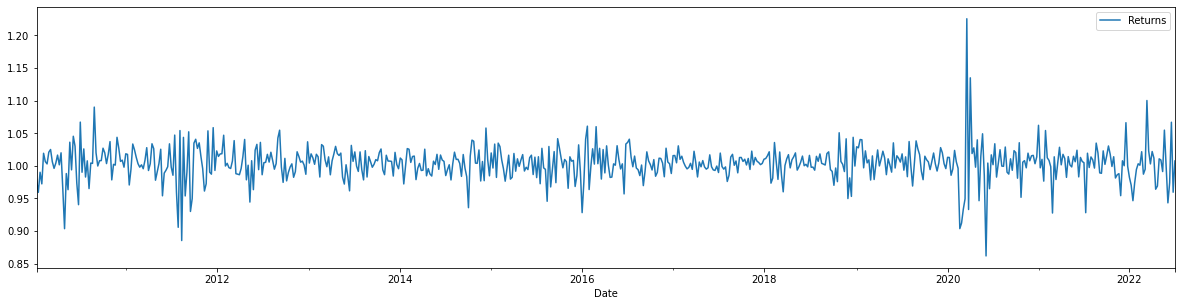

In [49]:
returns_pct.plot(figsize = (20.4,4.8));

In [50]:
returns_pct[['Returns']].loc[returns_pct['Returns'] == returns_pct['Returns'].max()]

,Returns
Date,
2020-03-23,1.2255


#### March 23, 2020

In [51]:
top50_pct.loc[['2020-03-23']]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,PENN,MGM,CZR,VTR,CCL,APTV,APA,OKE,DXC,SEE,...,VLO,EXPE,ROST,FITB,KEY,AIZ,KIM,COF,UHS,PHM


In [52]:
start_2020_03_23 = dt.datetime(2020,3,23)
end_2020_03_23 = start_2020_03_23 + timedelta(days = 6)
max_tickers_2020_03_23 = pd.DataFrame()
for ticker in sp.columns:
    max_tickers_2020_03_23[ticker] = sp[[ticker]][start_2020_03_23:end_2020_03_23].pct_change().apply(lambda x: (1+x).cumprod())
max_tickers_2020_03_23.iloc[[-1]]

C:\Users\jackm\AppData\Local\Temp\ipykernel_16584\1210797565.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  max_tickers_2020_03_23[ticker] = sp[[ticker]][start_2020_03_23:end_2020_03_23].pct_change().apply(lambda x: (1+x).cumprod())


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-27,1.118984,1.369756,1.217834,1.104158,1.126667,1.106182,1.097476,1.186883,1.133551,0.995314,...,1.099705,1.1754,1.174881,1.189028,1.156427,1.212491,1.174855,1.081127,1.145349,1.206238


In [53]:
max_tickers_2020_03_23.loc['2020-03-27'][max_tickers_2020_03_23.loc['2020-03-27'] > 1].count()

486

486/503 tickers had positive returns this week. This is an outlier not related to the strategy.

https://www.federalreserve.gov/newsevents/pressreleases/monetary20200323b.htm

https://www.americanactionforum.org/insight/timeline-the-federal-reserve-responds-to-the-threat-of-coronavirus/

March 20, 2020: The Fed expands Money Market Liquidity Facility to include high-quality municipal bonds as collateral. This facility makes loans to purchase $58 billion of securities in its first month.
https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr980.pdf

March 23,2020: The Fed, among other actions:

Opened quantitative easing to include commercial mortgage backed securities(CMBS). $58.9 billion worth of CMBS were originated in the US in 2020.
https://www.statista.com/statistics/942195/volume-cmbs-originations-usa/

Opened two special purpose vehicles to make corporate loans and purchase corporate bonds and bond ETFs. Together, "the two initiatives ... purchased $750 billion in bonds."
https://www.investopedia.com/primary-market-corporate-credit-facility-pmccf-4800889

## Portfolio Value

In [54]:
capital2 = 1000
value_pct = []
for i in returns_pct['Returns']:
    capital2 *= i
    value_pct.append(capital2)
value_pct = pd.DataFrame(value_pct, index = returns_pct.index)
value_pct.columns = ['Portfolio Value']
df3 = pd.DataFrame([0],columns = ['Portfolio Value'],index = [sp.index[-1]])
value_pct.append(df3)
value_pct = value_pct.shift(1)
value_pct.iloc[0] = 1000
value_pct

,Portfolio Value
Date,
2010-01-11,1000.000000
2010-01-18,978.900000
2010-01-25,939.058770
2010-02-01,929.762088
2010-02-08,904.007678
...,...
2022-06-06,8532.472181
2022-06-13,8047.827761
2022-06-20,7838.584239


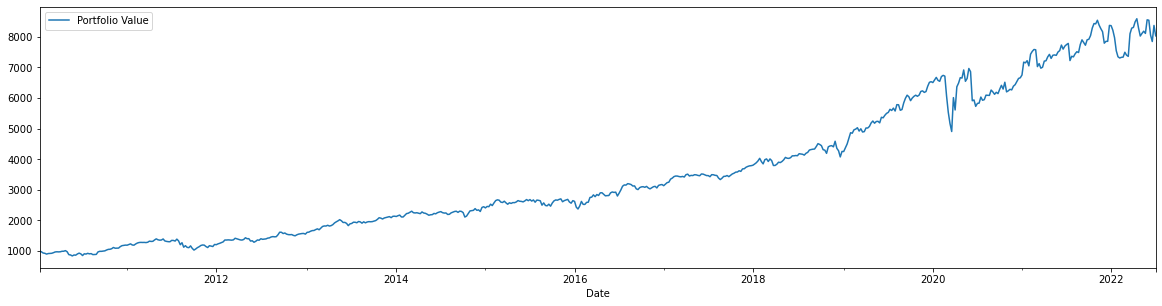

In [55]:
value_pct.plot(figsize = (20,4.8));

#### Max Value

In [56]:
value_pct['Portfolio Value'].loc[value_pct['Portfolio Value'] == value_pct['Portfolio Value'].max()]

Date
2022-04-18    8581.512148
Freq: W-MON, Name: Portfolio Value, dtype: float64

## Stats

In [57]:
starting_value2 = value_pct.iloc[0][0]
starting_value2

1000.0

In [58]:
final_value2 = float(value_pct.iloc[-1])
final_value2

8023.53249891243

In [59]:
annual_return_pct = (1/total_years)*(np.log(final_value2/starting_value2))
annual_return_pct

0.16598192293262498

In [60]:
1000*np.exp(annual_return_pct*total_years)

8023.532498912429

In [61]:
value_pct_change_pct = value_pct.pct_change()
value_pct_change_pct

,Portfolio Value
Date,
2010-01-11,NaN
2010-01-18,-0.0211
2010-01-25,-0.0407
2010-02-01,-0.0099
2010-02-08,-0.0277
...,...
2022-06-06,-0.0016
2022-06-13,-0.0568
2022-06-20,-0.0260


#### Sharpe

In [62]:
annualized_std_pct = value_pct_change_pct.std()*np.sqrt(52)
annualized_std_pct

Portfolio Value    0.194171
dtype: float64

In [63]:
sharpe_pct = annual_return_pct/annualized_std_pct
sharpe_pct

Portfolio Value    0.854822
dtype: float64

## S&P 500

In [64]:
spy_value

,SPY Value
Date,
2010-01-04,1000.000000
2010-01-05,1002.647096
2010-01-06,1003.353016
2010-01-07,1007.588464
2010-01-08,1010.941479
...,...
2022-06-30,3328.774322
2022-07-01,3363.981153
2022-07-05,3370.334292


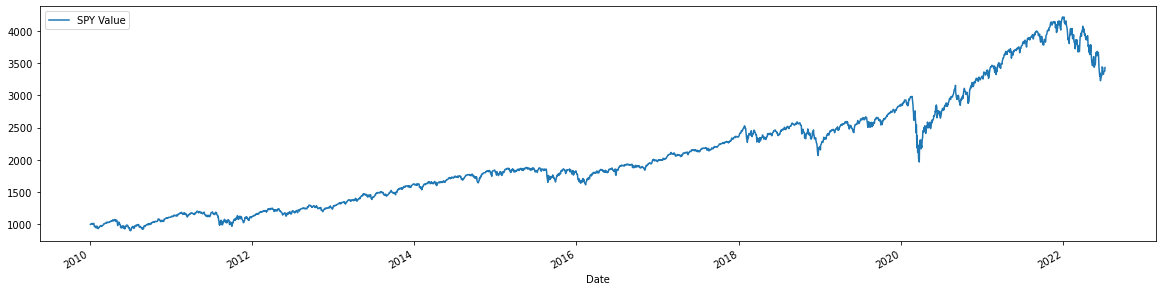

In [65]:
spy_value.plot(figsize = (20,4.8));

#### Stats

In [66]:
spy_final_value

3432.365516187459

In [67]:
spy_starting_value

1000.0

In [68]:
spy_annual_return

0.09829967267812988

In [69]:
spy_annualized_std

0.17368447449036112

In [70]:
spy_sharpe

0.5659669522366271

## Combined Plot

In [71]:
pct_spy = value_pct.join(spy_value)
pct_spy = pct_spy.fillna(method = 'ffill')
pct_spy['SPY Value'].iloc[0] = 1000
pct_spy

,Portfolio Value,SPY Value
Date,,
2010-01-11,1000.000000,1000.000000
2010-01-18,978.900000,1012.353318
2010-01-25,939.058770,968.587266
2010-02-01,929.762088,962.322384
2010-02-08,904.007678,934.350990
...,...,...
2022-06-06,8532.472181,3633.548062
2022-06-13,8047.827761,3308.920797
2022-06-20,7838.584239,3308.920797


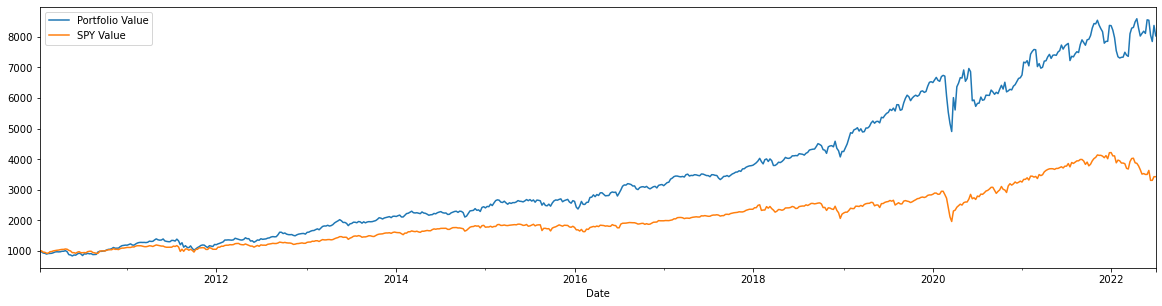

In [72]:
pct_spy.plot(figsize = (20,4.8));

In [73]:
pct_spy.corr()

,Portfolio Value,SPY Value
Portfolio Value,1.000000,0.977808
SPY Value,0.977808,1.000000


In [74]:
cov_pct = pct_spy.pct_change().cov()
cov_pct

,Portfolio Value,SPY Value
Portfolio Value,0.000725,0.000470
SPY Value,0.000470,0.000574


In [75]:
beta_pct = cov_pct['SPY Value'].iloc[0]/cov_pct['SPY Value'].iloc[-1]
beta_pct

0.8195982966358404

## Comparison

### Return

In [76]:
annual_return

0.10271459355461607

In [77]:
annual_return_pct

0.16598192293262498

In [78]:
(annual_return_pct - annual_return)/(annual_return)

0.6159526819756922

### Standard Deviation

In [79]:
annualized_std

Portfolio Value    0.15533
dtype: float64

In [80]:
annualized_std_pct

Portfolio Value    0.194171
dtype: float64

In [81]:
(annualized_std_pct - annualized_std)/(annualized_std)

Portfolio Value    0.250054
dtype: float64

### Sharpe

In [82]:
sharpe

Portfolio Value    0.661266
dtype: float64

In [83]:
sharpe_pct

Portfolio Value    0.854822
dtype: float64

In [84]:
(sharpe_pct - sharpe)/(sharpe_pct)

Portfolio Value    0.226429
dtype: float64

# Discussion

### About
This was a very meaningful project for me. The idea came from a co-op I did in 2019 where my boss introduced me to the idea of momentum investing. The challenge I faced was having to find a method for predicting how a stock would trend. At the time I only knew how to use Excel, so the linear regression function in Excel would have to do. The result was interesting. Somehow, I "beat" the market with this "strategy." At the time I thought I was super cool, now I just think I did something wrong. This notebook is a Python update of that project. 

### Results
As we can see, my original strategy (regression based on daily prices) does not adequately predict the trends of the market one week in the future. While there was a slight improvement on annual return and standard deviation, this method ultimately matched the S&P quite closely. On the other hand, the second method (regression based on daily percent change) worked much better. There was a 61% increase in annual return and 22% increase in Sharpe ratio. Unfortunately, these were accompanied by a 25% increase in annualized standard deviation, meaning the portfolio became more volatile.

### What I learned
1) Beating the market as younger me had thought is very hard. 
2) The yfinance library is much faster than pandas_datareader. 
3) The yfinance library can easily handle lists of tickers (the documentation sometimes formatted multiple tickers as one string with spaces in between the symbols, I did not realize there was a different way to download multiple tickers).
4) Plugging in my laptop makes these cells execute much more quickly; I must verify my intuition, lest it be wrong.

### Assumptions
1) that a margin account is being used. This strategy involves investing the entire value of a portfolio each week. With a cash account, the two day settlement period would force a wait between when money could be invested, or a shortened holding period (Wednesday to Friday instead of Monday to Friday). A margin account sidesteps the settlement issue, and since this does not involve day trading, there is no account balance minimum. 
2) That there are no broker fees. While this could be included, I elected to leave it out. 

### Problems
1) The process "beat" the market. This leads me to believe I did something wrong. I'm not sure what that is though, as the returns regression part was copied directly from the price regression, which had a more believable result.
2) While second strategy did have an improved Sharpe ratio, it is still not above 1.
3) My Sharpe ratio calculations assume a 0% risk free rate. This is not the case. The 10 Year US Treasury Rate, a common stand in for the risk free rate, is currently at 3.1%.
4) The beta I calculated for the percent change regression was below 1. This does not seem to match up visually with the graph of the portfolio values.
5) I do not have a strategy to capitalize on the stocks which are predicted to have a negative return in a given week. Ostensibly the regression strategy would work equities with a negative coefficient.

### In the Future
A good project may be to estimate expected returns using regression. This would allow me to weight components of the portfolio for maximum Sharpe ratio, then compare the resultant returns. I could also expand the number of tickers on which to perform the regression. Perhaps weighting the chosen components in a manner similar to a growth index would improve results.